<a href="https://colab.research.google.com/github/erlanggaard/Data-Cleansing-and-Modeling/blob/main/Data_Cleansing_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Data

Titanic Dataset merupakan data keselamatan penumpang pada tragedi kapal titanic pada tahun 1909. 
<li>Data ini mengandung informasi data penumpang kapal titanic dan informasi apakah penumpang selamat atau tidak
<li>Pada data ini, satu row atau satu baris merupakan informasi seputar penumpang. jadi pada +-700 baris ini merupakan informasi +-700 penumpang pada kapal titanic
<li>Pada kolom survived, angka 0 merepresentasikan bahwa penumpang tidak selamat, sedangkan angka 1 merepresentasikan penumpang selamat

## Read Data

In [131]:
import pandas as pd

In [132]:
df_titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [133]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dealing with Missing Values

<li> kita bisa menggantinya dengan nilai yang wajar
<li> kita bisa membuang observasi yang memiliki nilai kosong

Note : Metode ini akan sangat berbahaya jika dilakukan untuk proses analisis, tetapi dapat diterapkan apabila untuk kebutuhan modelling atau machine learning

In [134]:
df_titanic.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Pada data diatas ini, ada dua kolom yang memiliki missing values, yaitu pada kolom **age** terdapat 177 nilai yang hilang dan pada kolom **Cabin** 687 data hilang.

### menghandle missing values pada "Age"

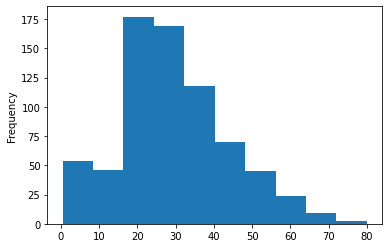

In [135]:
df_titanic['Age'].plot(kind='hist') #Menggambarkan histogram persebaran umur pada penumpang kapal

In [136]:
rata_umur_penumpang = df_titanic['Age'].mean()    #Menghitung rata-rata umur pada penumpang Kapal Titanic
rata_umur_penumpang

29.69911764705882

In [137]:
df_titanic['Age'] = df_titanic['Age'].fillna(rata_umur_penumpang) #memasukan nilai rataan kedalam missing value pada kolom age

In [138]:
df_titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.0,0,0,347089,6.9750,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
753,754,0,3,"Jonkoff, Mr. Lalio",male,23.0,0,0,349204,7.8958,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


In [139]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### menghandle missing values pada "Embarked"

In [140]:
df_titanic[df_titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [141]:
df_titanic = df_titanic[~df_titanic['Embarked'].isna()] #menghapus kolom embarked yang null

In [142]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [143]:
df_titanic['PassengerId'].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
302    1
303    1
304    1
305    1
891    1
Name: PassengerId, Length: 889, dtype: int64

Tidak ada data yang duplikat

## How to overcome with outlier

### Outlier Numerik

In [144]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [145]:
df_titanic.sort_values('Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C


In [146]:
df_titanic.groupby('Pclass').agg({'Fare':'mean'})

,Fare
Pclass,
1,84.193516
2,20.662183
3,13.675550


In [147]:
bool_filter = df_titanic['Fare']>0
df_titanic[bool_filter].groupby('Pclass').agg({'Fare':'mean'})

,Fare
Pclass,
1,86.207715
2,21.358661
3,13.787875


In [148]:
df_titanic.loc[(df_titanic['Pclass']==1) & (df_titanic['Fare']==0) , 'Fare'] = 86.207715
df_titanic.loc[(df_titanic['Pclass']==2) & (df_titanic['Fare']==0) , 'Fare'] = 21.358661
df_titanic.loc[(df_titanic['Pclass']==3) & (df_titanic['Fare']==0) , 'Fare'] = 13.787875

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [149]:
df_titanic.sort_values('Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Outlier Kategorikal

In [150]:
list_kolom_kategorikal = df_titanic.select_dtypes('object').columns
for col in list_kolom_kategorikal :
  print(df_titanic[col].value_counts())
  print('='*30)

Braund, Mr. Owen Harris              1
Boulos, Mr. Hanna                    1
Frolicher-Stehli, Mr. Maxmillian     1
Gilinski, Mr. Eliezer                1
Murdlin, Mr. Joseph                  1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Keane, Miss. Nora A                  1
Williams, Mr. Howard Hugh "Harry"    1
Dooley, Mr. Patrick                  1
Name: Name, Length: 889, dtype: int64
male      577
female    312
Name: Sex, dtype: int64
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 146, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


## String Processing

<li> Mengekstrak informasi tertentu dari suatu string
<li> memperbaiki data yang tidak konsisten

In [151]:
df_titanic['title']  = df_titanic['Name'].str.split(', ').str[1].str.split('.').str[0]
df_titanic['title'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: title, dtype: int64

In [152]:
df_titanic['title'].isin(['Mr', 'Miss', 'Mrs']).map({True:'normal', False:'unique'})

0      normal
1      normal
2      normal
3      normal
4      normal
        ...  
886    unique
887    normal
888    normal
889    normal
890    normal
Name: title, Length: 889, dtype: object

In [153]:
df_titanic['title_category'] = df_titanic['title'].isin(['Mr', 'Miss', 'Mrs']).map({True:'normal', False:'unique'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,title_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr,normal
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs,normal
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,normal
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs,normal
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev,unique
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss,normal
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Miss,normal
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr,normal


## Machine Learning KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [156]:
model = KNeighborsClassifier()

In [157]:
X = df_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df_titanic['Survived']

In [158]:
model.fit(X, y)

KNeighborsClassifier()

In [160]:
prediksi = model.predict(X)

In [162]:
(prediksi == y).mean()

0.7829021372328459

Pada model ini, akurasi yang didapatkan sebesar 78%.